<a href="https://colab.research.google.com/github/KaramAlmaghout/SurgicalToolsSegmentation/blob/main/AML_Assignment1_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Applied MAchine Learning - Assignment 2

### Train YOLOv8 on a custom data using Detectron 2


**Karam Almaghout:**

k.almaghout@innopolis.university

In [ ]:
!nvidia-smi

Mon Mar  6 16:26:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

### Download Our Custom Dataset from Roboflow in YOLOv8 format

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Xbp6CtDn4FZ1jGn5BIlr")
project = rf.workspace("amlcourse").project("manipulators-detection")
dataset = project.version(4).download("yolov8")


/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=20e417a679f26b80547fac7acd753f8889d09e10ed6f20103750375082bfe43e
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Manipulators-Detection-4 in yolov8:: 100%|██████████| 492/492 [00:00<00:00, 1382.44it/s]


## Training

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8m-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

/content
100% 52.4M/52.4M [00:07<00:00, 7.02MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.yaml, data=/content/datasets/Manipulators-Detection-4/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torc

In [ ]:
!ls {HOME}/runs/segment/train4/

args.yaml					     results.csv
BoxF1_curve.png					     results.png
BoxP_curve.png					     train_batch0.jpg
BoxPR_curve.png					     train_batch1260.jpg
BoxR_curve.png					     train_batch1261.jpg
confusion_matrix.png				     train_batch1262.jpg
events.out.tfevents.1678124691.f922c7c86bfc.27857.0  train_batch1.jpg
MaskF1_curve.png				     train_batch2.jpg
MaskP_curve.png					     val_batch0_labels.jpg
MaskPR_curve.png				     val_batch0_pred.jpg
MaskR_curve.png					     weights


/content


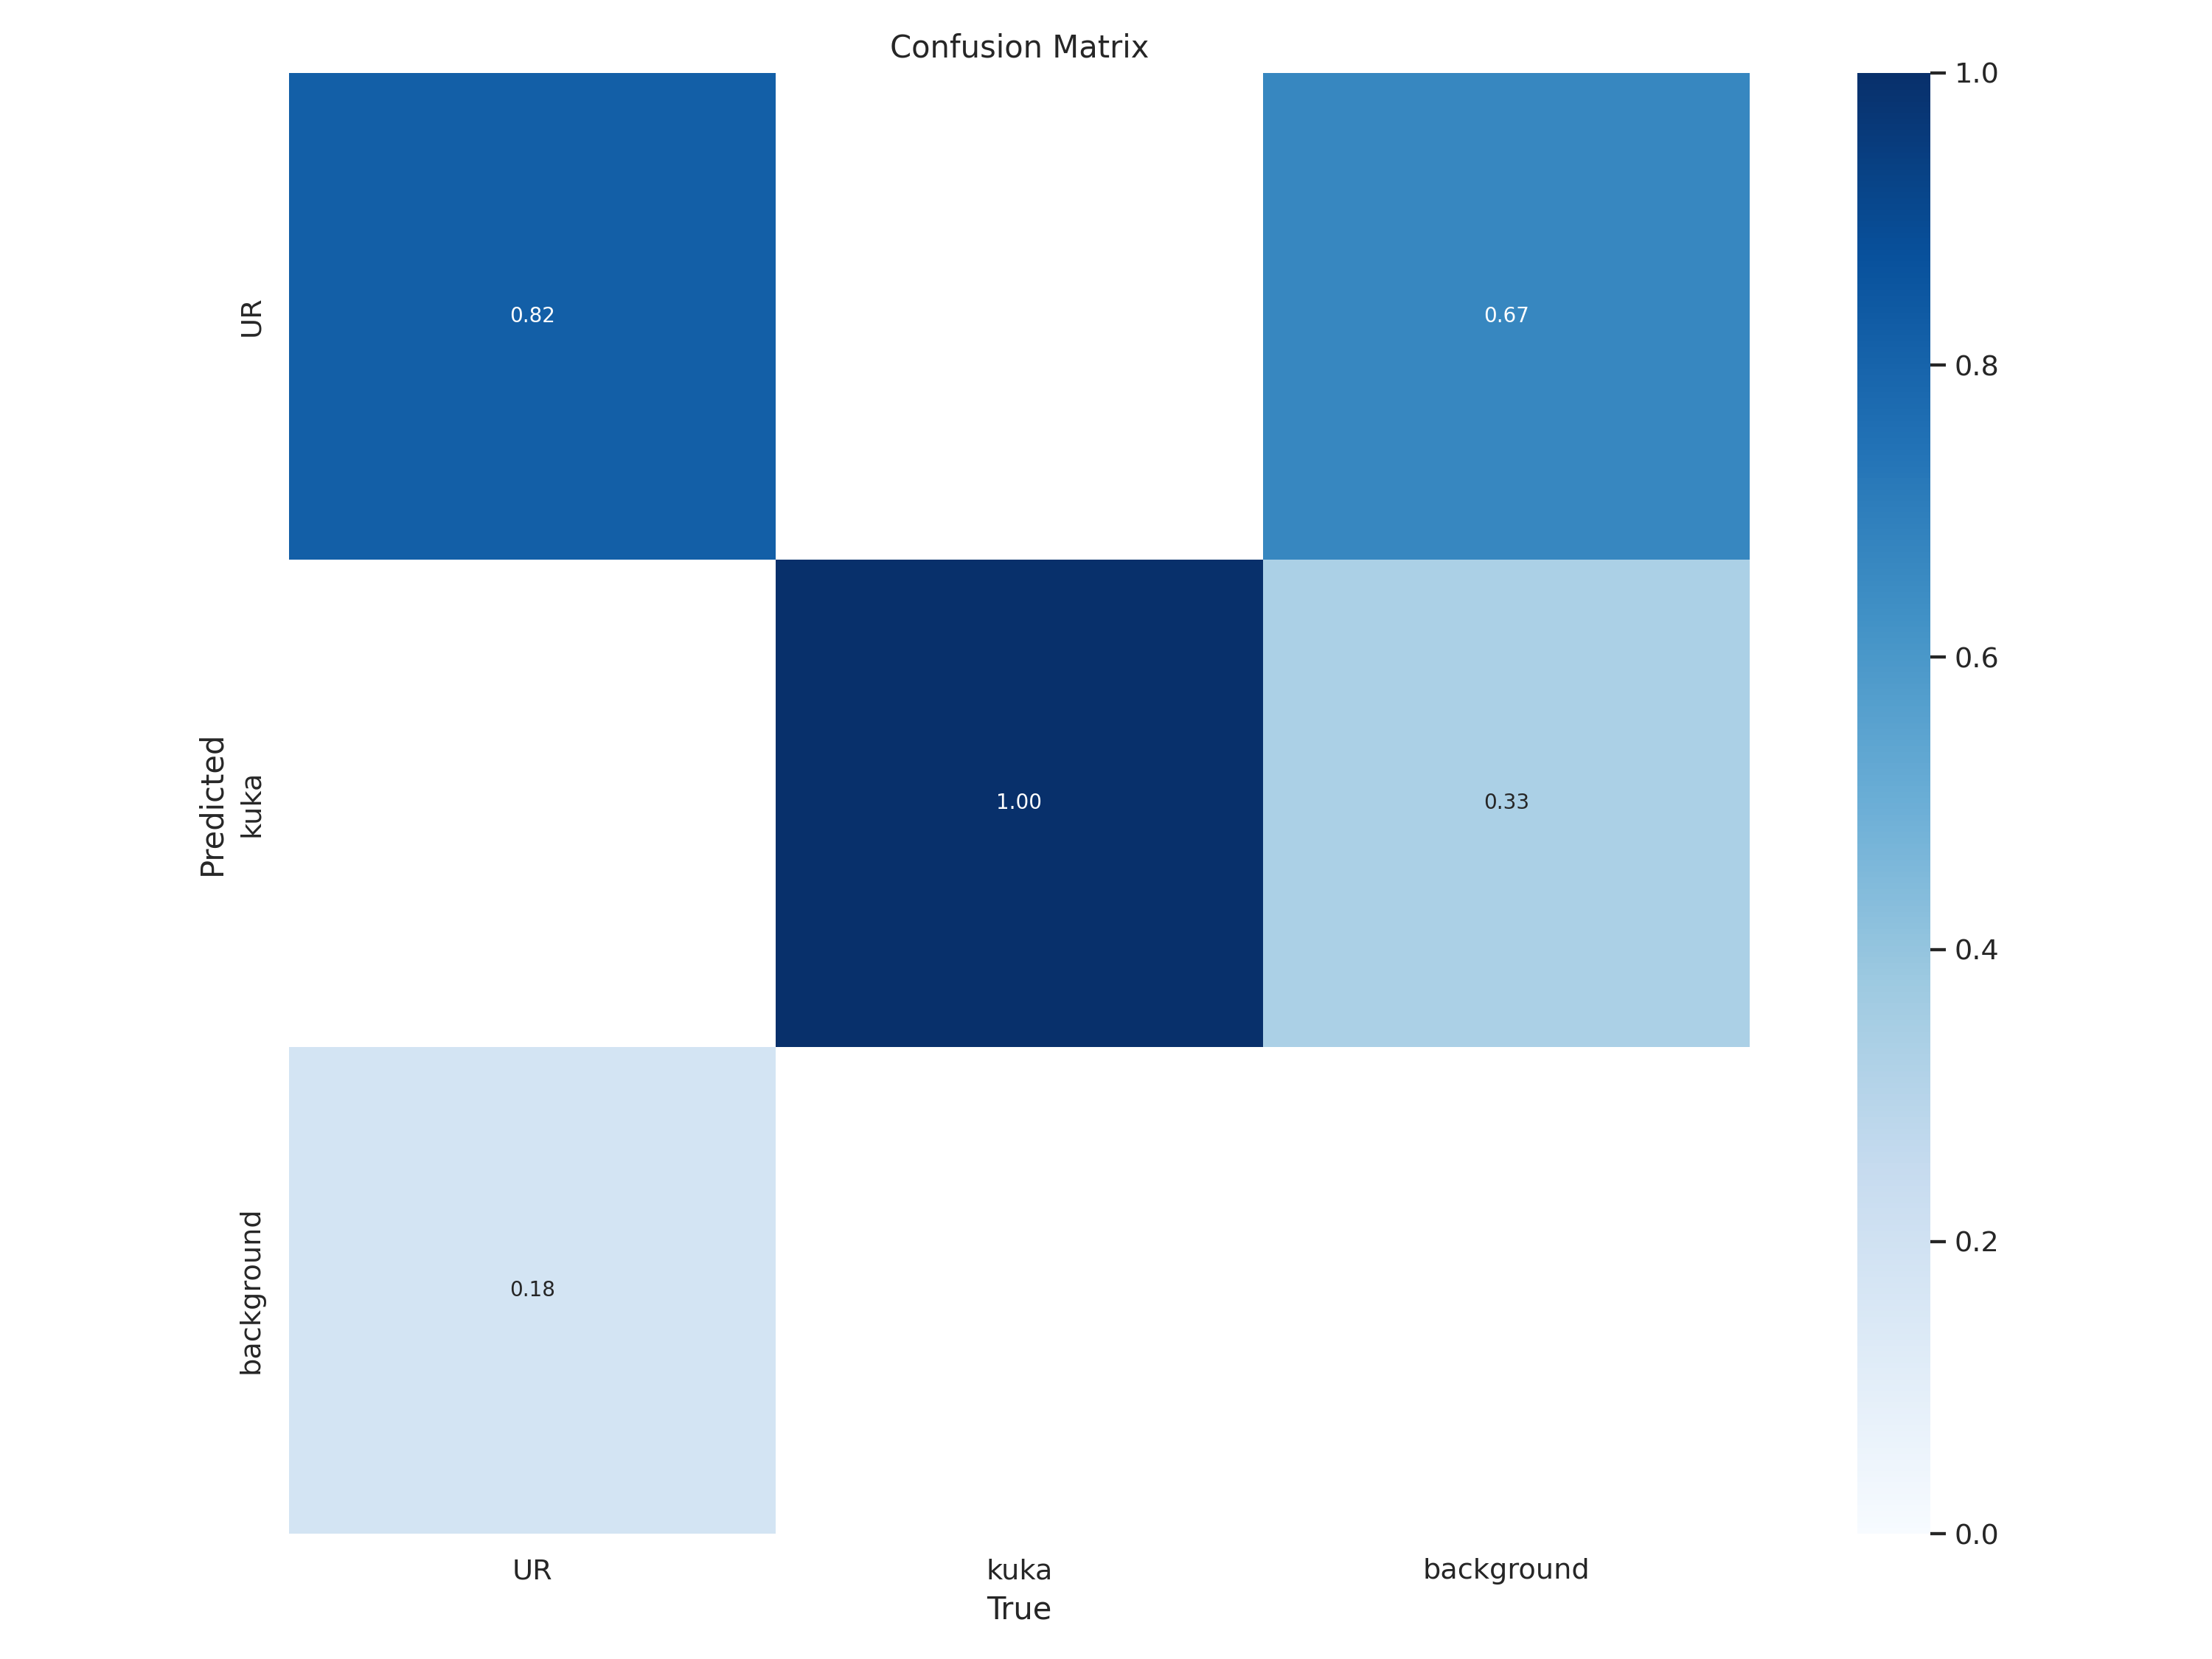

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train4/confusion_matrix.png', width=600)

/content


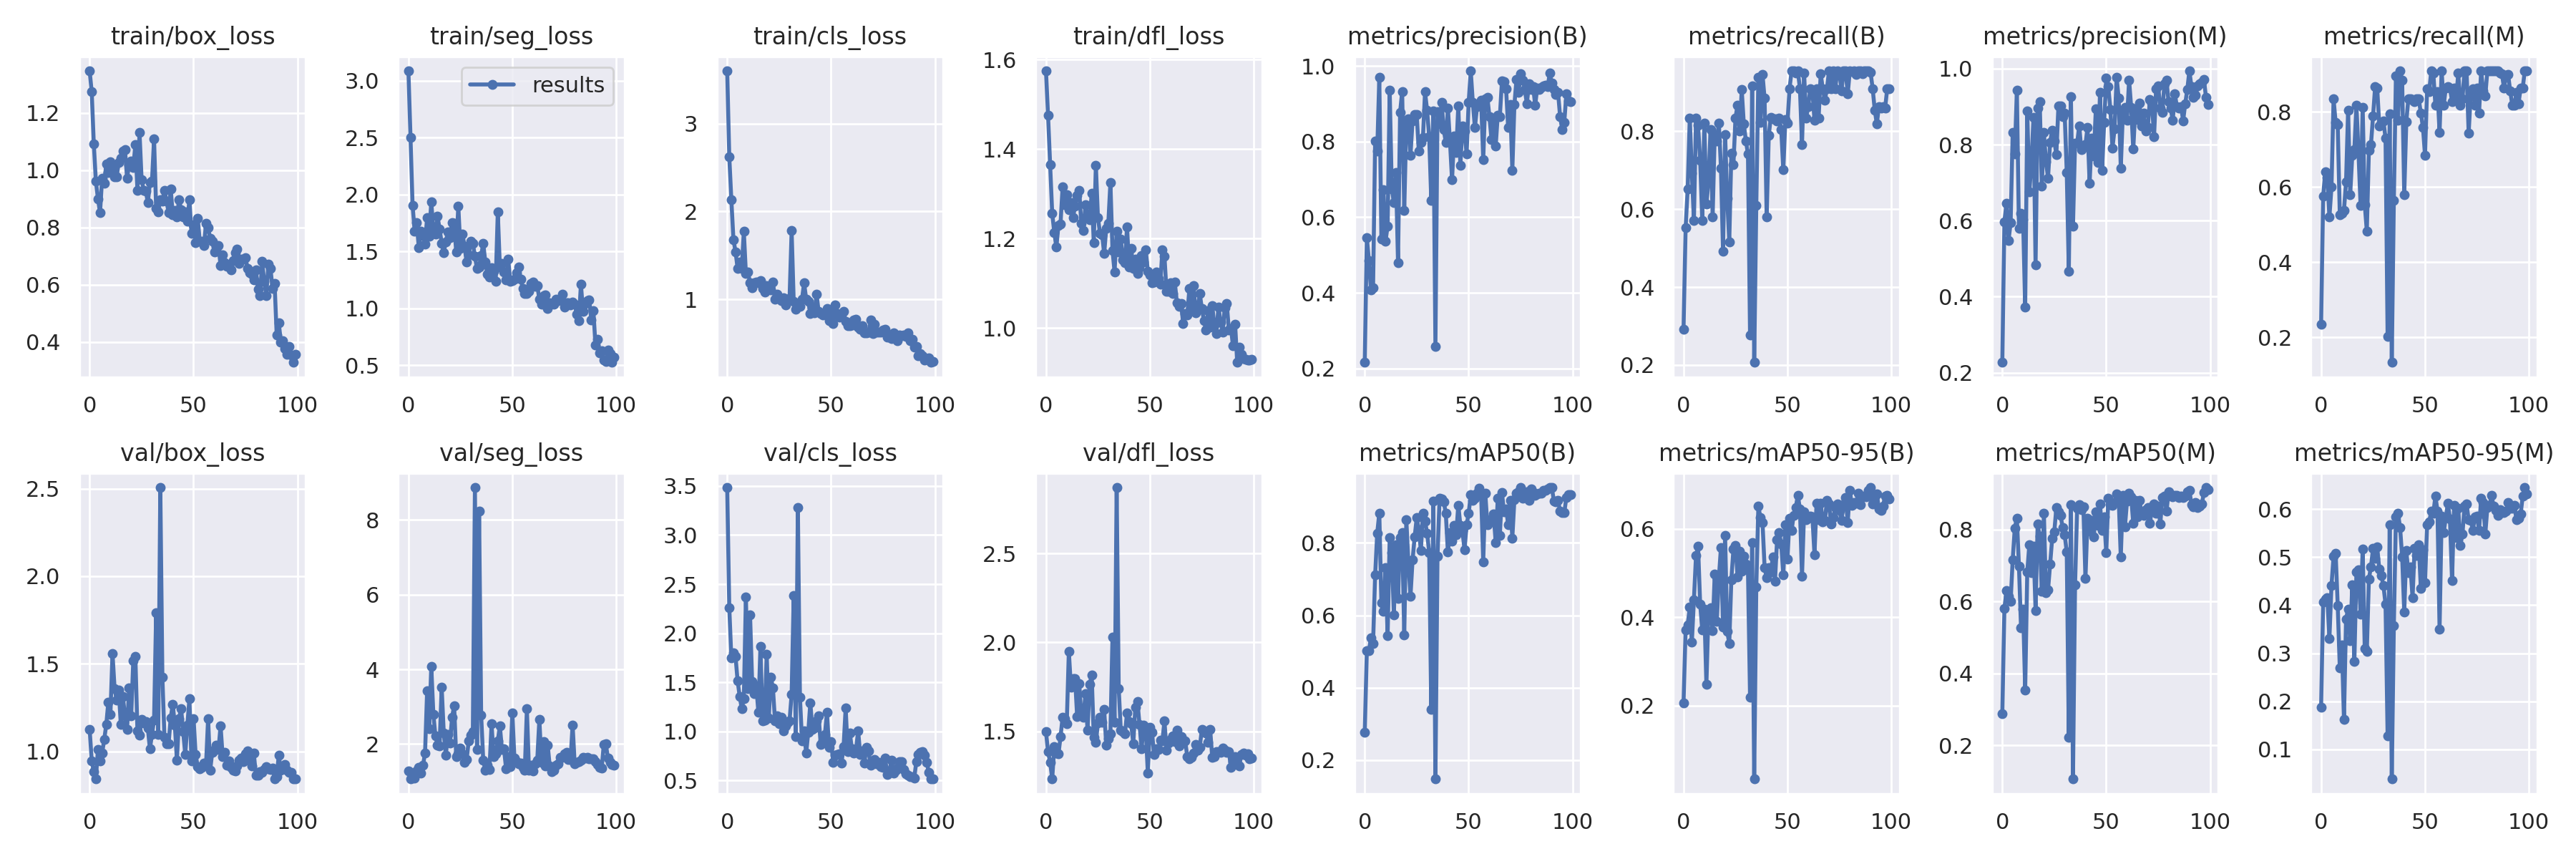

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train4/results.png', width=600)

/content


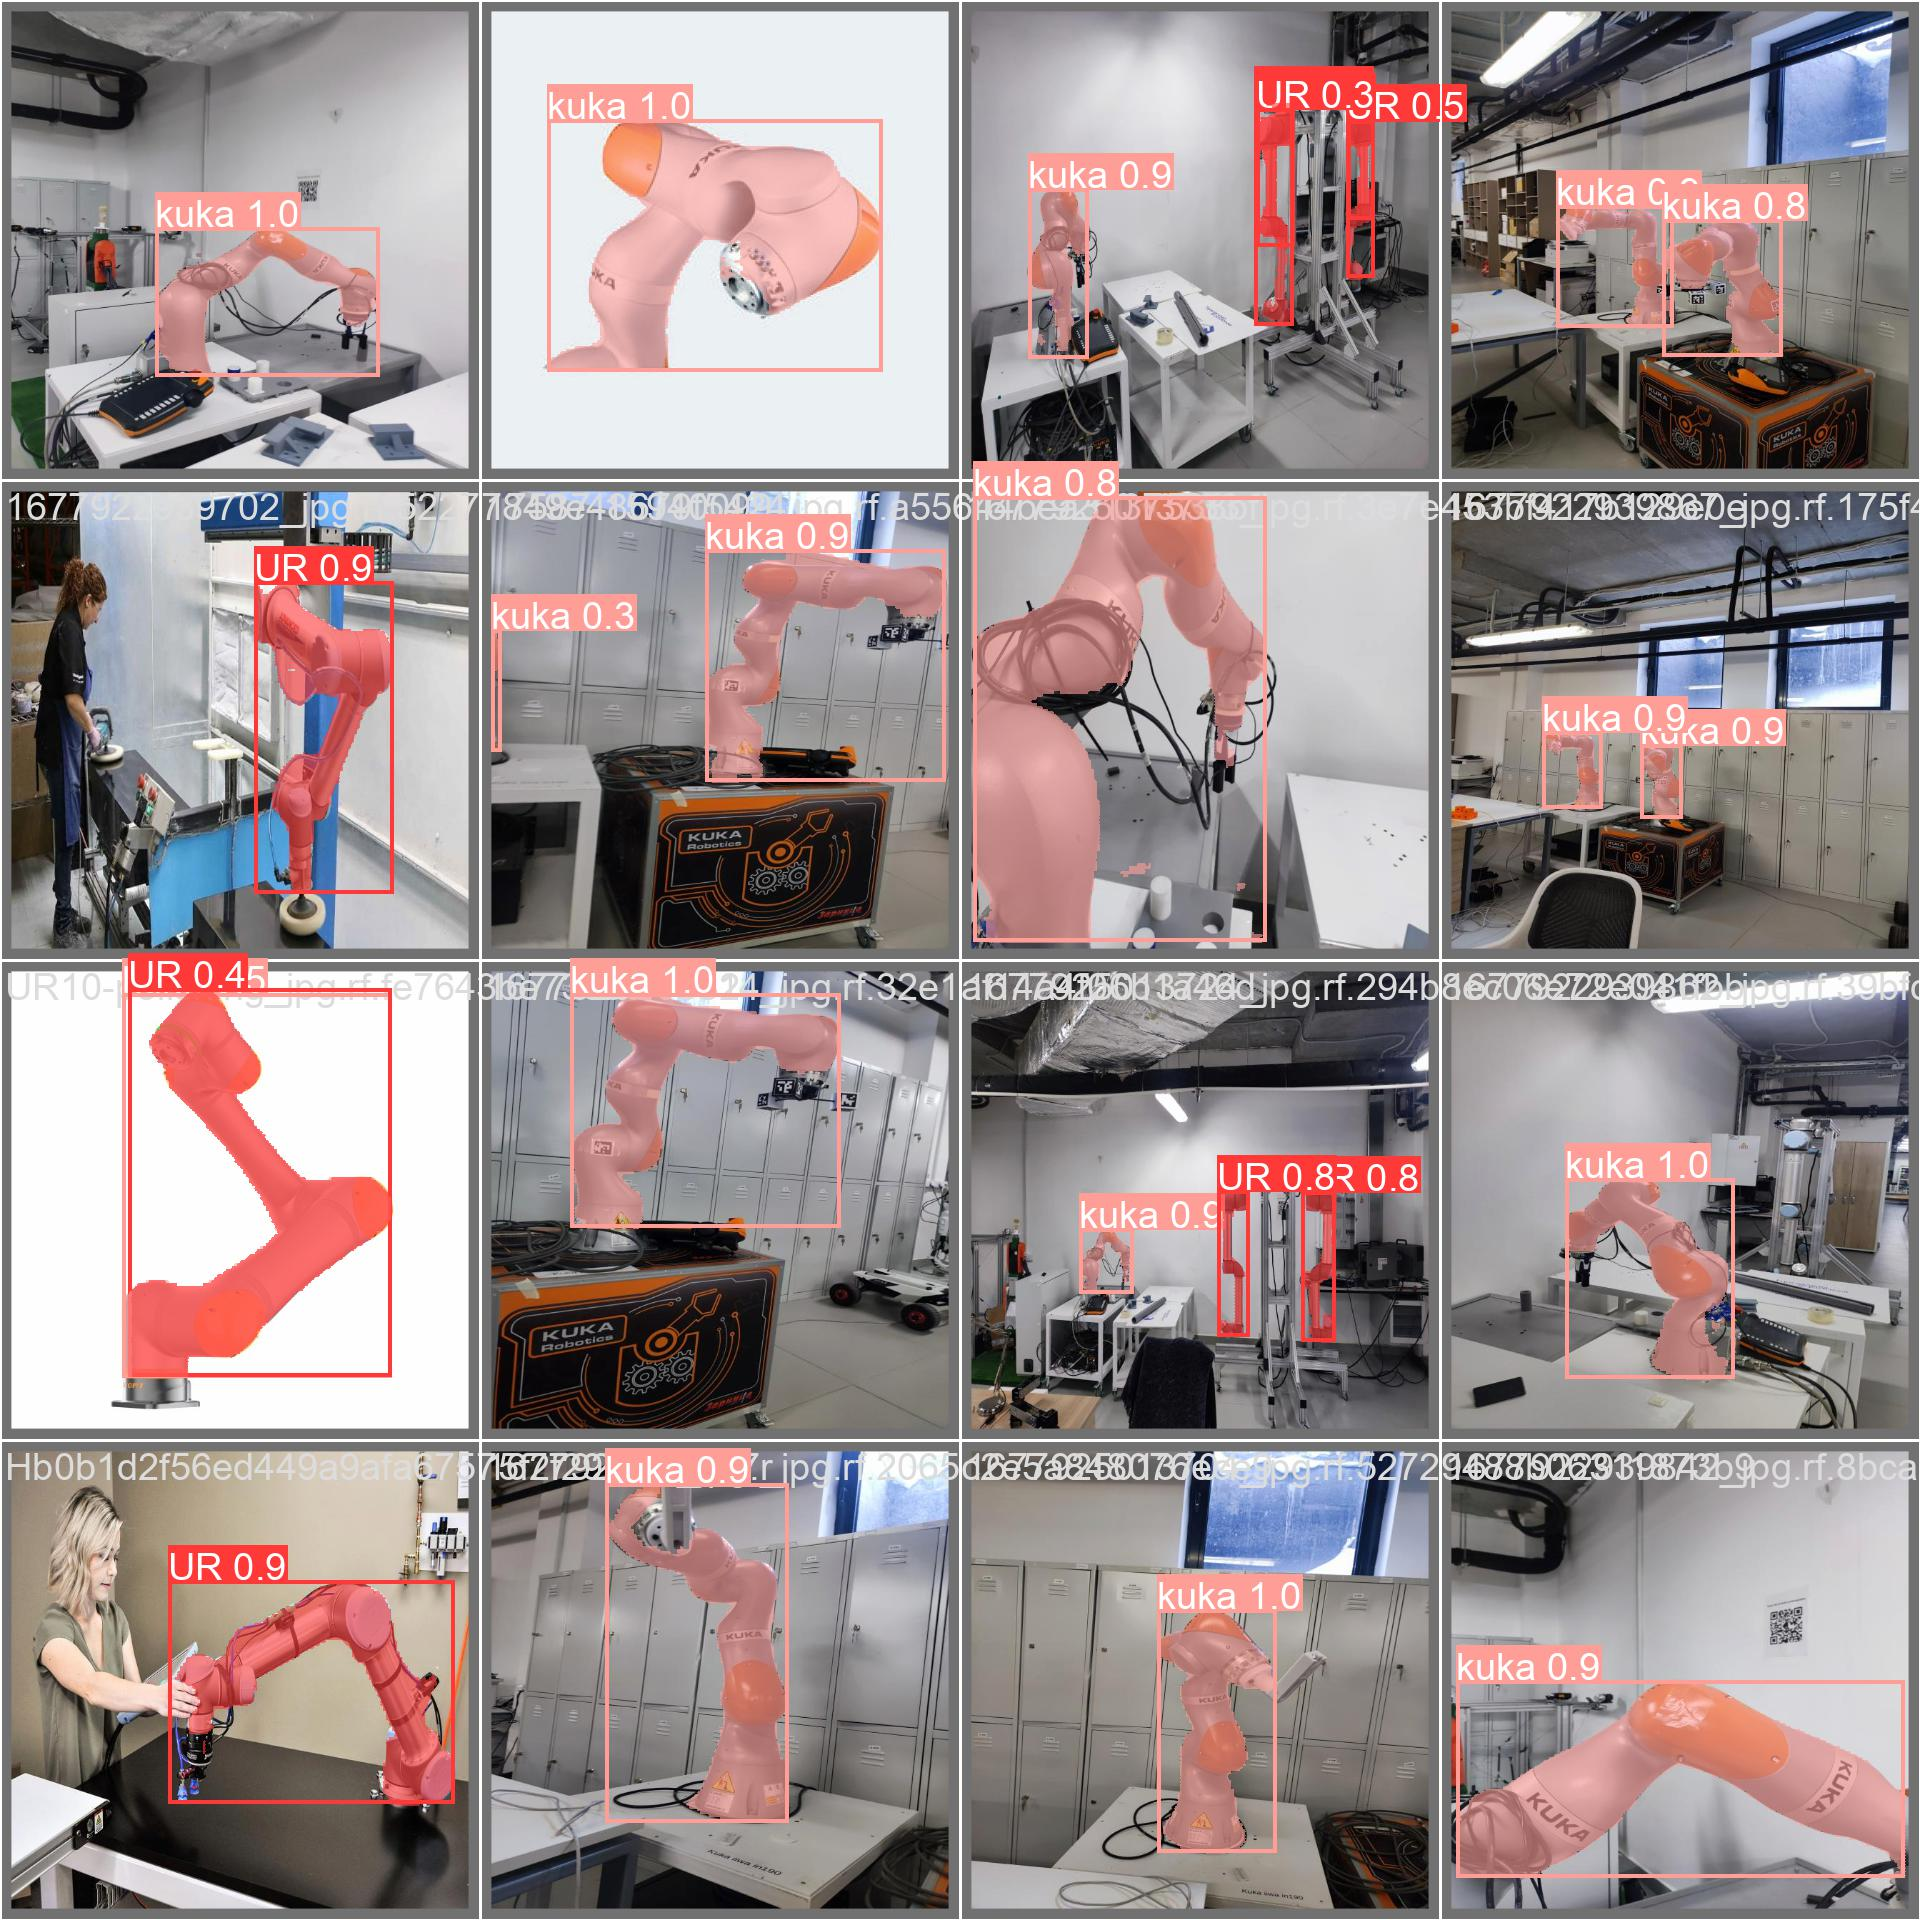

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train4/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train4/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/datasets/Manipulators-Detection-4/valid/labels.cache... 20 images, 1 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.32it/s]
                   all         20         28      0.907      0.909      0.934      0.676      0.924      0.909      0.918      0.641
                    UR         20         11      0.876      0.818      0.872      0.561      0.902      0.818      0.841      0.529
                  kuka         20         17      0.939          1      0.995      0.791      0.947          1      0.995      0.752
Speed: 0.3ms pre-process, 34.2ms inference, 0.0ms loss, 1.5ms post-process per image


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train4/weights/best.pt conf=0.4 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs
image 1/10 /content/datasets/Manipulators-Detection-4/test/images/1677922939696_jpg.rf.3130b8f28f5f2da36852388af75da00f.jpg: 640x640 1 UR, 1 kuka, 46.8ms
image 2/10 /content/datasets/Manipulators-Detection-4/test/images/1677922939708_jpg.rf.854fead73e19387412dd00feb826e042.jpg: 640x640 1 kuka, 46.8ms
image 3/10 /content/datasets/Manipulators-Detection-4/test/images/1677922939735_jpg.rf.08ea3195826b1dc1fa3c64c6bbfd51bd.jpg: 640x640 1 kuka, 37.8ms
image 4/10 /content/datasets/Manipulators-Detection-4/test/images/1677922939770_jpg.rf.226deaab64cf116758924cfac30bee17.jpg: 640x640 1 UR, 26.8ms
image 5/10 /content/datasets/Manipulators-Detection-4/test/images/1677922939812_jpg.rf.88c6e9100475ac06d46b6090f605968b.jpg: 640x640 1 kuka, 26.8ms
image 6/10 /content/datasets/Manipulators-Detection-4/test/images/167792

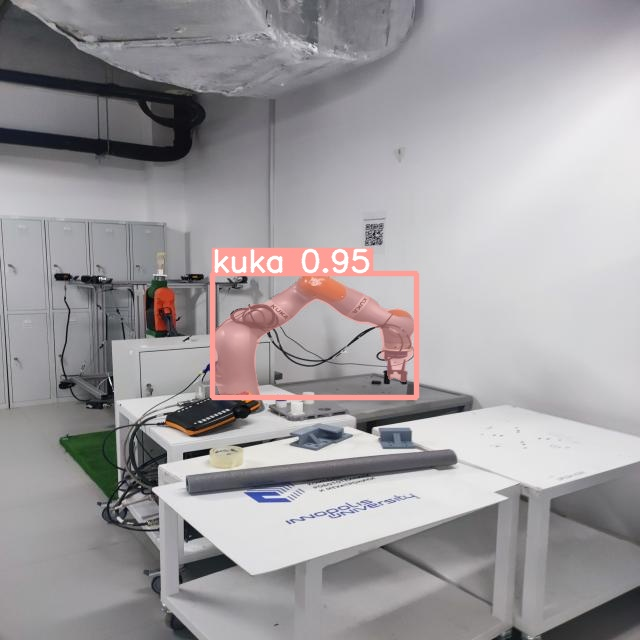

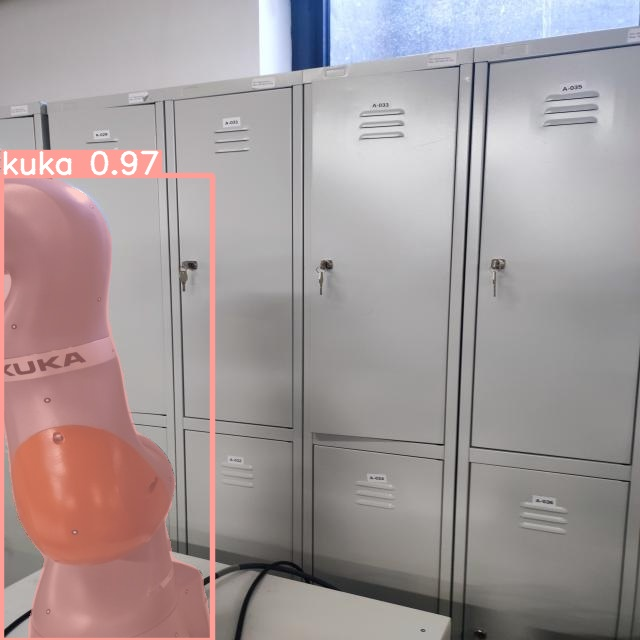

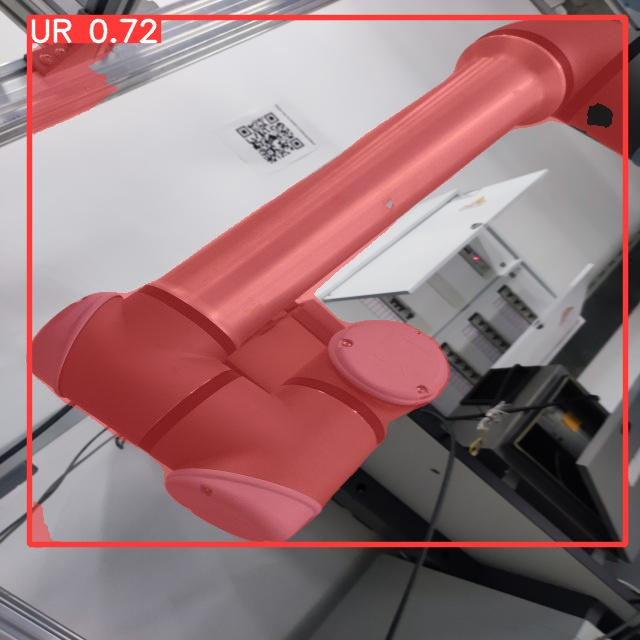

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict4/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")